In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 591 kB 4.8 MB/s 
     |████████████████████████████████| 679 kB 8.9 MB/s 
     |████████████████████████████████| 211 kB 20.3 MB/s 
     |████████████████████████████████| 636 kB 18.7 MB/s 
     |████████████████████████████████| 1.1 MB 27.1 MB/s 
     |████████████████████████████████| 120 kB 45.7 MB/s 
     |████████████████████████████████| 1.2 MB 44.1 MB/s 
     |████████████████████████████████| 840 kB 51.7 MB/s 
     |████████████████████████████████| 6.3 MB 51.9 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 103 kB 70.7 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 99 kB 8.4 MB/s 
     |████████████████████████████████| 37.1 MB 48 kB/s 
     |████████████████████████████████| 352 kB 56.1 MB/s 
     |████████████████████████████████| 200 kB 62.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sh

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import os

import seaborn as sn
from sklearn.metrics import confusion_matrix

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

In [ ]:
!wget --no-check-certificate -r \
      "https://drive.google.com/u/0/uc?id=1JZlWO_ekSE2uQn-zTGEofB0NIJ2SxkCE&export=download" \
      -O signhand_datasets.zip

will be placed in the single file you specified.

--2021-08-10 11:41:36--  https://drive.google.com/u/0/uc?id=1JZlWO_ekSE2uQn-zTGEofB0NIJ2SxkCE&export=download
Resolving drive.google.com (drive.google.com)... 209.85.200.139, 209.85.200.113, 209.85.200.100, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vg4vjta8sfup3p07gr53djcvui0ui7c4/1628595675000/10618232739771296396/*/1JZlWO_ekSE2uQn-zTGEofB0NIJ2SxkCE?e=download [following]
--2021-08-10 11:41:39--  https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vg4vjta8sfup3p07gr53djcvui0ui7c4/1628595675000/10618232739771296396/*/1JZlWO_ekSE2uQn-zTGEofB0NIJ2SxkCE?e=download
Resolving doc-10-8o-docs.googleusercontent.com (doc-10-8o-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Con

In [ ]:
ds_path = "Datasets"

In [ ]:
import os, zipfile


zip_archive = "signhand_datasets.zip"
zip_ref = zipfile.ZipFile(zip_archive, "r")
zip_ref.extractall(ds_path)
zip_ref.close()

In [ ]:
datasets = DataLoader.from_folder(ds_path)

INFO:tensorflow:Load image with size: 600, num_label: 24, labels: A, B, C, D, E, F, G, H, I, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y.


In [ ]:
training, rest = datasets.split(0.8) # 80% for training
validation, testing = rest.split(0.5) # 10% for testing, 10% for validation

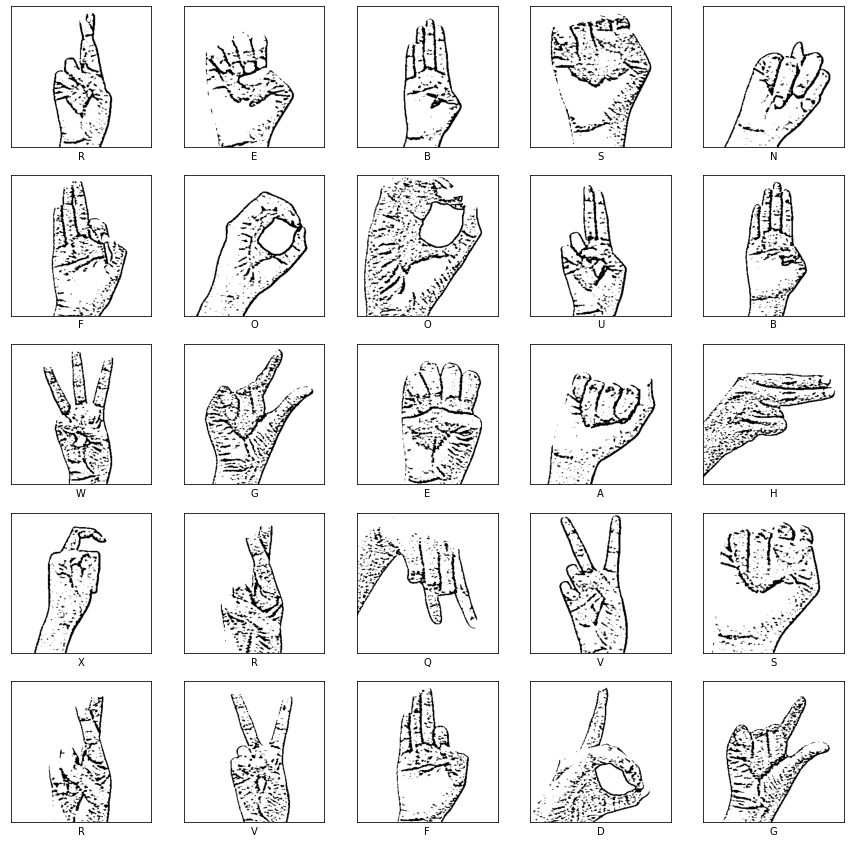

In [ ]:
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(
    datasets.gen_dataset().unbatch().take(25)):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(datasets.index_to_label[label.numpy()])

plt.show()

In [ ]:
efficientnet_model = model_spec.get("efficientnet_lite1")

In [ ]:
model = image_classifier.create(training,
                                epochs=10,
                                validation_data=validation,
                                use_augmentation=True,
                                shuffle=True,
                                model_spec=efficientnet_model)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                30744     
Total params: 4,220,088
Trainable params: 30,744
Non-trainable params: 4,189,344
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


15/15 [==============================] - 31s 2s/step - loss: 3.3016 - accuracy: 0.0437 - val_loss: 3.0500 - val_accuracy: 0.1562
Epoch 2/10
15/15 [==============================] - 27s 2s/step - loss: 2.9865 - accuracy: 0.1354 - val_loss: 2.6644 - val_accuracy: 0.4688
Epoch 3/10
15/15 [==============================] - 27s 2s/step - loss: 2.6455 - accuracy: 0.3208 - val_loss: 2.3423 - val_accuracy: 0.6562
Epoch 4/10
15/15 [==============================] - 26s 2s/step - loss: 2.4684 - accuracy: 0.4271 - val_loss: 2.0932 - val_accuracy: 0.7188
Epoch 5/10
15/15 [==============================] - 26s 2s/step - loss: 2.2706 - accuracy: 0.5208 - val_loss: 1.8873 - val_accuracy: 0.8438
Epoch 6/10
15/15 [==============================] - 26s 2s/step - loss: 2.1066 - accuracy: 0.5604 - val_loss: 1.7471 - val_accuracy: 0.8750
Epoch 7/10
15/15 [==============================] - 26s 2s/step - loss: 2.0012 - accuracy: 0.6083 - val_loss: 1.6781 - val_accuracy: 0.8125
Epoch 8/10
15/15 [=============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                30744     
Total params: 4,220,088
Trainable params: 30,744
Non-trainable params: 4,189,344
_________________________________________________________________


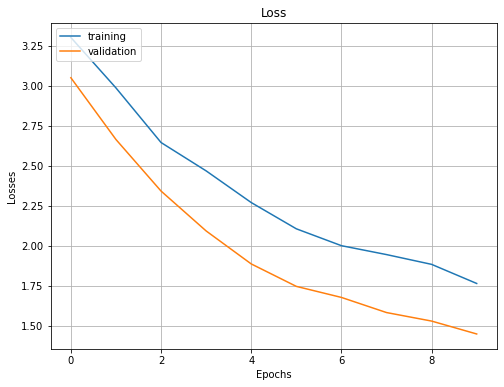

In [ ]:
%matplotlib inline

#Loss graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

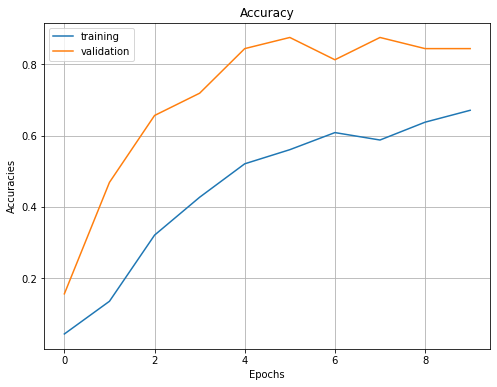

In [ ]:
#Accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

In [ ]:
model.evaluate(testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


2/2 [==============================] - 4s 1s/step - loss: 1.4874 - accuracy: 0.8000


[1.4873740673065186, 0.800000011920929]

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


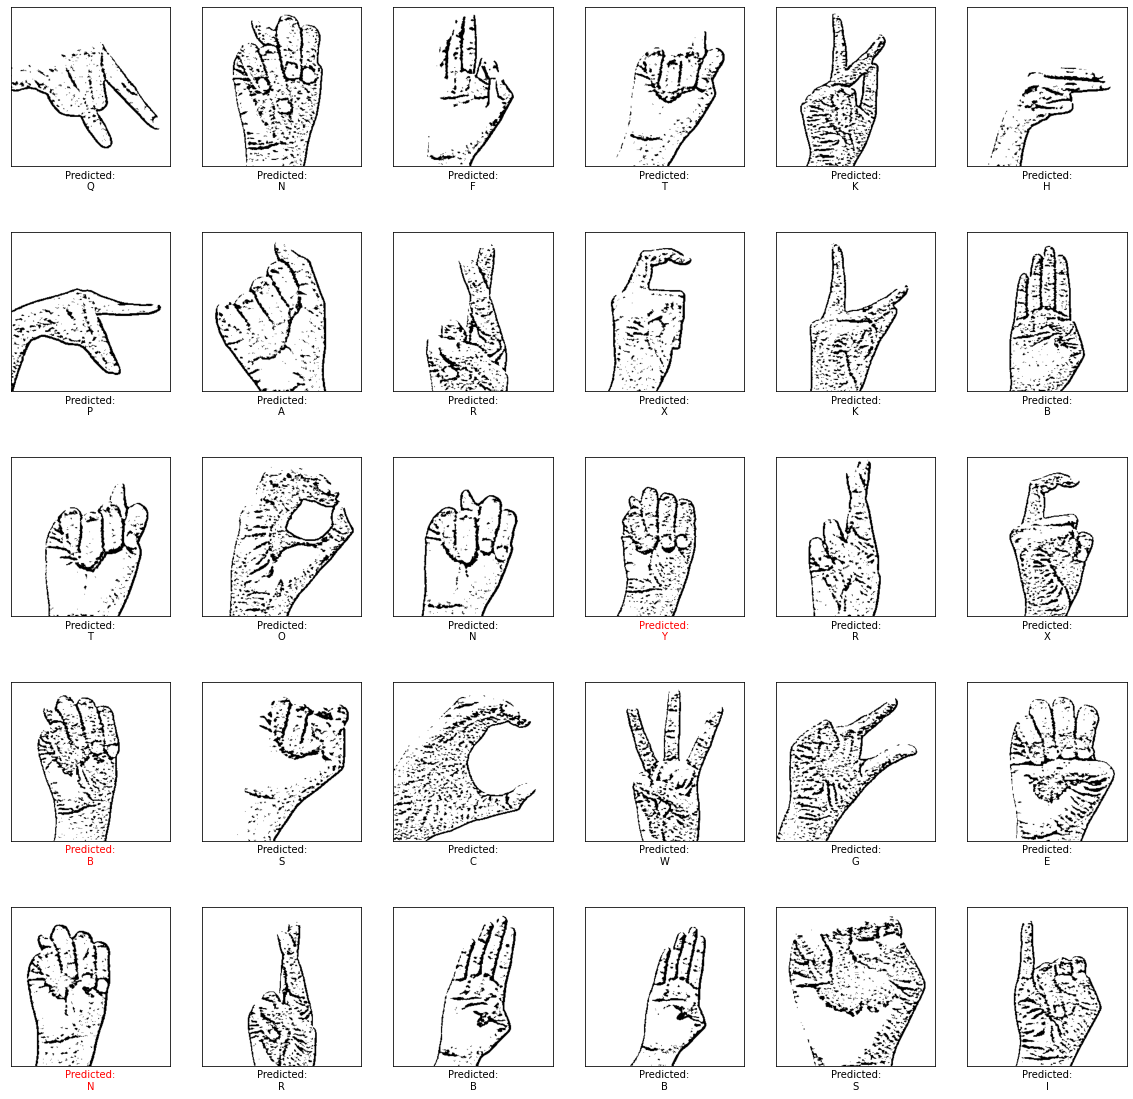

In [ ]:
def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"

plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(testing)
for i, (image, label) in enumerate(
    testing.gen_dataset().unbatch().take(30)):
  ax = plt.subplot(5, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap="Greys")

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          testing.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))

plt.show()

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


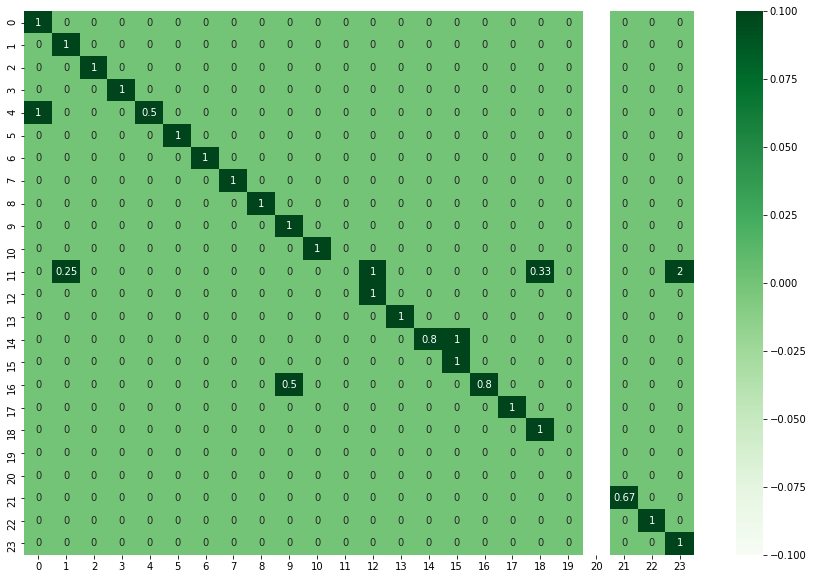

In [ ]:
labels = os.listdir(os.path.join(ds_path))
labels.sort()

label_dicts = {}

for i in range(len(labels)):
  label_dicts[labels[i]] = i

predicts = model.predict_top_k(testing)
predict_labels = [ label_dicts[predicts[i][0][0]]
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]

actual_labels = [ label.numpy()
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]

plt.figure(figsize=(15, 10))
signhand_cm = confusion_matrix(y_true=actual_labels, y_pred=predict_labels)
signhand_cm = signhand_cm / signhand_cm.sum(axis=1) # To display conf. matrix in percetage %

sn.heatmap(signhand_cm, annot=True, cmap="Greens")

In [ ]:
model.export(export_dir=".")

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmp47v4tala/assets


INFO:tensorflow:Assets written to: /tmp/tmp47v4tala/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp6elfqmox/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp6elfqmox/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [ ]:
model.evaluate_tflite("model.tflite", testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.8}

In [ ]:
quantizer = QuantizationConfig.for_int8(representative_data=testing)

model.export(export_dir=".", quantization_config=quantizer)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmpzcsn87ab/assets


INFO:tensorflow:Assets written to: /tmp/tmpzcsn87ab/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp8qy7c9cq/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp8qy7c9cq/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.evaluate_tflite("model.tflite", testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.8}

In [ ]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>